____________

### DATASET INFORMATION: 




## Dataset Description
This dataset contains:
* 310 Observations
* 12 Features 
* 1 Lebel

|__ col. no.__| __Attribute name__| __type__| 
|-------------|---------------------|-----------|
| Col1 | pelvic_incidence | numeric, float64|
|Col2|pelvic_tilt |numeric, float64 |
|Col3| lumbar_lordosis_angle |numeric, float64|
|Col4|sacral_slope|numeric, float64|
|Col5| pelvic_radius  |numeric, float64|
|Col6|degree_spondylolisthesis   |numeric, float64|
|Col7| pelvic_slope |numeric, float64|
|Col8|Direct_tilt  |numeric, float64|
|Col9| thoracic_slope |numeric, float64|
|Col10|  cervical_tilt |numeric, float64|
|Col11| sacrum_angle |numeric, float64|
|Col12| scoliosis_slope |numeric, float64|
|Class_att| Attribute Class | categorical, object|

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix,precision_score,recall_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,PowerTransformer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

from sklearn.metrics import f1_score

In [22]:
# Kindly change the below cells from markdown to code and execute it 
import pandas as pd

import csv

with open("data_set.csv","r")as file:

    reader=csv.reader(file) 
    df=pd.read_csv("data_set.csv",names=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope'
                                          ,'cervical_tilt','sacrum_angle','scoliosis_slope','Attribute','Description'],header=0)

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Attribute,Description
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


import pandas as pd

import csv

with open("data_set.csv","r")as file:

reader=csv.reader(file)
df=pd.read_csv("data_set.csv")

df.head()

In [23]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'Attribute', 'Description'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Attribute                 310 non-null    object 
 13  Description               14 non-null     object 
dtypes: float64

There are 14 columns (12 numeric and 2 categorical features)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


From this data we can say that degree_spondylolisthesis has some extreme outliers
and Sacrum_angle has negative ranges

In [28]:
cat_df = df.select_dtypes(exclude = np.number)

In [34]:
for col in cat_df.columns:
    print(col,''':''')
    print(df[col].value_counts(),'\n')




Attribute :
Abnormal    210
Normal      100
Name: Attribute, dtype: int64 

Description :
 Attribute12= scoliosis_slope(numeric)                1
Prediction is done by using binary classification.    1
Attribute5 = pelvic_radius (numeric)                  1
Attribute2 = pelvic_tilt (numeric)                    1
 Attribute8= Direct_tilt(numeric)                     1
 Attribute10= cervical_tilt(numeric)                  1
Attribute1  = pelvic_incidence  (numeric)             1
Attribute3 = lumbar_lordosis_angle (numeric)          1
 Attribute7= pelvic_slope(numeric)                    1
Attribute6 = degree_spondylolisthesis (numeric)       1
Attribute class {Abnormal, Normal}                    1
 Attribute11=sacrum_angle(numeric)                    1
 Attribute9= thoracic_slope(numeric)                  1
Attribute4 = sacral_slope (numeric)                   1
Name: Description, dtype: int64 



In [100]:
data = df.copy()
data.drop(columns = 'Description',inplace=True)

In [101]:
cat_data = df.select_dtypes(exclude = np.number)
num_data = df.select_dtypes(include = np.number)

In [102]:
data['numeric_target'] = data['Attribute'].map({'Abnormal':0,'Normal':1})

In [103]:
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Attribute,numeric_target
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal,1


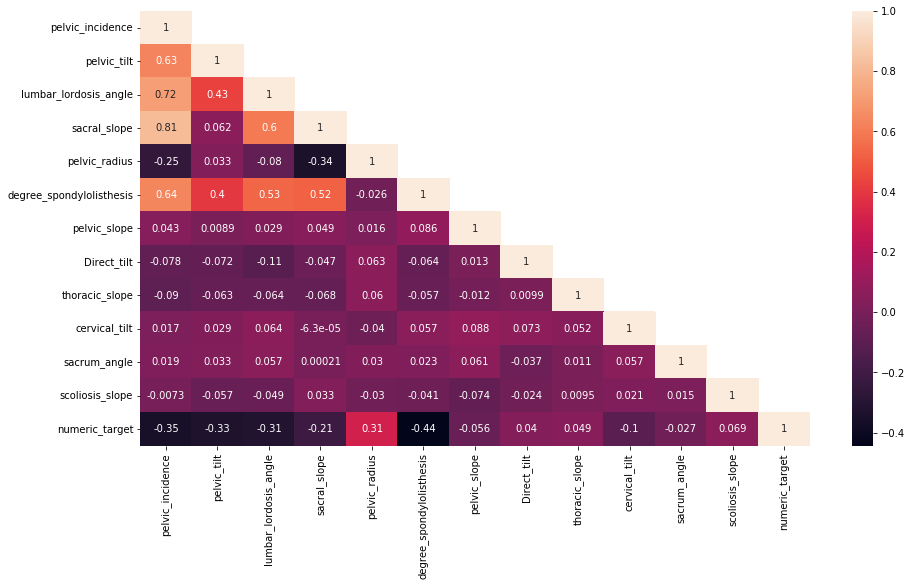

In [104]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,mask=np.triu(data.corr(),+1))

data['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_score','degree_spondylolisthesis'] are Important negative correlated features

 even though these pelvic_slope,Direct_title,Thoraic_slope,cervial_tilr,sacrum_angel,scoliosis_slope are low correlated with target to build the basemodel taking these features in account

In [105]:
data.drop(columns='Attribute',inplace=True)

In [106]:
scale = StandardScaler()
scaled_data = scale.fit_transform(num_data)
num_data = pd.DataFrame(data=scaled_data,columns=num_data.columns)
num_data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0.006694,0.639127,1.302680,1.635969,-1.227178,-0.615686
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,-0.363213,0.259554,-0.105211,-0.176157,-1.345020,-0.652989
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0.246670,1.643094,0.851472,-1.059666,-0.190502,-0.069858
...,...,...,...,...,...,...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491,-1.202961,-1.562606,0.496104,-1.182667,-0.137294,-1.351275
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503,-1.489758,-0.246123,1.512183,-1.677586,1.644047,1.746585
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488,-1.373550,-0.593083,0.144949,-1.051583,1.443374,-0.693032
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548,-1.099547,-0.763798,0.892189,-0.752649,1.623849,0.773765


In [109]:
data_s = num_data

In [110]:
data_s['target'] = data['numeric_target']

In [111]:
data_s

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,target
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368,0
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941,0
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0.006694,0.639127,1.302680,1.635969,-1.227178,-0.615686,0
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,-0.363213,0.259554,-0.105211,-0.176157,-1.345020,-0.652989,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0.246670,1.643094,0.851472,-1.059666,-0.190502,-0.069858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491,-1.202961,-1.562606,0.496104,-1.182667,-0.137294,-1.351275,1
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503,-1.489758,-0.246123,1.512183,-1.677586,1.644047,1.746585,1
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488,-1.373550,-0.593083,0.144949,-1.051583,1.443374,-0.693032,1
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548,-1.099547,-0.763798,0.892189,-0.752649,1.623849,0.773765,1


In [209]:
X = data_s.drop(columns='target')
y = data_s['target']



Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,train_size=0.70,random_state=1)

In [210]:
data_s.shape

(310, 13)

In [211]:
print(Xtrain.shape)
print(Xtest.shape)

(217, 12)
(93, 12)


In [212]:
from scipy.stats import ttest_ind

#Hypothesis:
#H0 : mean1 == mean2
#H1 : mean1 != mean2
t_stats,pvalue = ttest_ind(ytrain,ytest)

if pvalue<0.05:
    print('reject Null Hypothesis')
else:
    print('Fails to reject Null hypothesis,statisfy the assumption that test and train mean are equally distributed ')

Fails to reject Null hypothesis,statisfy the assumption that test and train mean are equally distributed 


In [213]:
X

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0.006694,0.639127,1.302680,1.635969,-1.227178,-0.615686
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,-0.363213,0.259554,-0.105211,-0.176157,-1.345020,-0.652989
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0.246670,1.643094,0.851472,-1.059666,-0.190502,-0.069858
...,...,...,...,...,...,...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491,-1.202961,-1.562606,0.496104,-1.182667,-0.137294,-1.351275
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503,-1.489758,-0.246123,1.512183,-1.677586,1.644047,1.746585
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488,-1.373550,-0.593083,0.144949,-1.051583,1.443374,-0.693032
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548,-1.099547,-0.763798,0.892189,-0.752649,1.623849,0.773765


In [214]:
def plot_roc_curve(model,Xtest,ytest):
    ypred_proba = model.predict_proba(Xtest)

    fpr,tpr,thersolds = roc_curve(ytest,ypred_proba[:,1])

    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color='r')

In [215]:
from sklearn.linear_model import LogisticRegression

In [216]:
base_model = LogisticRegression()
base_model.fit(Xtrain,ytrain)


LogisticRegression()

In [217]:
ypred = base_model.predict(Xtest)
accuracy_score(ytest,ypred)

0.8709677419354839

In [218]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        66
           1       0.78      0.78      0.78        27

    accuracy                           0.87        93
   macro avg       0.84      0.84      0.84        93
weighted avg       0.87      0.87      0.87        93



In [219]:
confusion_matrix(ytest,ypred)

array([[60,  6],
       [ 6, 21]])

In [220]:
pref_score = pd.DataFrame(columns = ['accuracy_score','cohen_kappa_score','precision_score','recall_score','f1_score'])

In [221]:
pref_score

,accuracy_score,cohen_kappa_score,precision_score,recall_score,f1_score


In [222]:
def update_performance(model_name,test,pred):
    global pref_score
    
    pref_score = pref_score.append({'model_name':model_name,'accuracy_score':accuracy_score(test,pred),'recall_score':recall_score(test,pred),'precision_score':precision_score(test,pred),'cohen_kappa_score':cohen_kappa_score(test,pred),
                                   'f1_score':f1_score(test,pred)},ignore_index=True)
    return pref_score

In [223]:
update_performance('Logistic_regression',ytest,ypred)

,accuracy_score,cohen_kappa_score,precision_score,recall_score,f1_score,model_name
0,0.870968,0.686869,0.777778,0.777778,0.777778,Logistic_regression


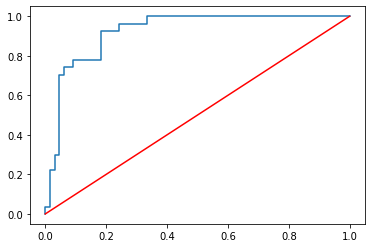

In [225]:
plot_roc_curve(base_model,Xtest,ytest)

In [226]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(Xtrain,ytrain)

ypred = dt_model.predict(Xtest)
accuracy_score(ytest,ypred)

update_performance('DecisionTreeClassifier',ytest,ypred)

,accuracy_score,cohen_kappa_score,precision_score,recall_score,f1_score,model_name
0,0.870968,0.686869,0.777778,0.777778,0.777778,Logistic_regression
1,0.784946,0.510269,0.606061,0.740741,0.666667,DecisionTreeClassifier


In [227]:
confusion_matrix(ytest,ypred)

array([[53, 13],
       [ 7, 20]])

In [190]:
from sklearn.neighbors import KNeighborsClassifier

Kn_model = KNeighborsClassifier()
Kn_model.fit(Xtrain,ytrain)

ypred = Kn_model.predict(Xtest)
accuracy_score(ytest,ypred)

update_performance('KNeighborsClassifier',ytest,ypred)

,accuracy_score,cohen_kappa_score,precision_score,recall_score,f1_score,model_name
0,0.817204,0.579409,0.65625,0.777778,0.711864,Logistic_regression
1,0.784946,0.520124,0.60000,0.777778,0.677419,DecisionTreeClassifier
2,0.709677,0.345582,0.50000,0.629630,0.557377,KNeighborsClassifier


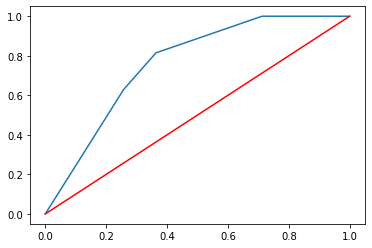

In [229]:
plot_roc_curve(Kn_model,Xtest,ytest)

In [230]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

gb_model = GaussianNB()
gb_model.fit(Xtrain,ytrain)

ypred = gb_model.predict(Xtest)
accuracy_score(ytest,ypred)

update_performance('GaussianNB',ytest,ypred)


BB_model = BernoulliNB()
BB_model.fit(Xtrain,ytrain)

ypred = BB_model.predict(Xtest)
accuracy_score(ytest,ypred)

update_performance('BernoulliNB',ytest,ypred)

,accuracy_score,cohen_kappa_score,precision_score,recall_score,f1_score,model_name
0,0.870968,0.686869,0.777778,0.777778,0.777778,Logistic_regression
1,0.784946,0.510269,0.606061,0.740741,0.666667,DecisionTreeClassifier
2,0.817204,0.604057,0.631579,0.888889,0.738462,GaussianNB
3,0.731183,0.417731,0.526316,0.740741,0.615385,BernoulliNB


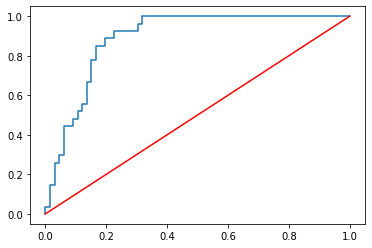

In [232]:
plot_roc_curve(gb_model,Xtest,ytest)

In [192]:
DecisionTreeClassifier(max_depth=10,min_samples_split=50,min_samples_leaf=50,criterion='entropy')

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50)

In [233]:
dt_model = DecisionTreeClassifier(max_depth=10,min_samples_split=50,min_samples_leaf=50,criterion='entropy')
dt_model.fit(Xtrain,ytrain)

ypred = dt_model.predict(Xtest)
accuracy_score(ytest,ypred)

update_performance('DecisionTreeClassifier_adjusted_param_grid',ytest,ypred)

,accuracy_score,cohen_kappa_score,precision_score,recall_score,f1_score,model_name
0,0.870968,0.686869,0.777778,0.777778,0.777778,Logistic_regression
1,0.784946,0.510269,0.606061,0.740741,0.666667,DecisionTreeClassifier
2,0.817204,0.604057,0.631579,0.888889,0.738462,GaussianNB
3,0.731183,0.417731,0.526316,0.740741,0.615385,BernoulliNB
4,0.806452,0.530303,0.666667,0.666667,0.666667,DecisionTreeClassifier_adjusted_param_grid


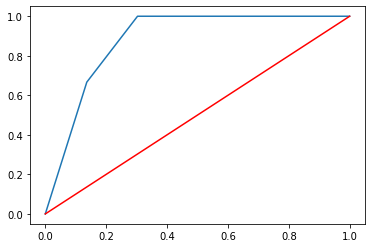

In [234]:
plot_roc_curve(dt_model,Xtest,ytest)

In [235]:
feature_import_dt = pd.DataFrame(dt_model.feature_importances_,index=X.columns,columns=['importance'])

In [236]:
feature_import_dt.sort_values('importance',ascending=False)

,importance
degree_spondylolisthesis,0.832843
pelvic_radius,0.167157
pelvic_incidence,0.000000
pelvic_tilt,0.000000
lumbar_lordosis_angle,0.000000
sacral_slope,0.000000
pelvic_slope,0.000000
Direct_tilt,0.000000
thoracic_slope,0.000000
cervical_tilt,0.000000


<Figure size 2880x1440 with 0 Axes>

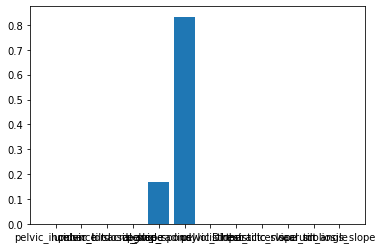

<Figure size 2880x1440 with 0 Axes>

In [237]:
plt.bar(data=feature_import_dt,x=X.columns,height='importance')
plt.figure(figsize=(40,20))


pelvic_radius = 0.167157
degree_spondylolisthesis  = 0.832843 palys major role

In [238]:
from xgboost import XGBClassifier


XGB_model = XGBClassifier()
XGB_model.fit(Xtrain,ytrain)

ypred = XGB_model.predict(Xtest)
accuracy_score(ytest,ypred)

update_performance('XGBClassifier',ytest,ypred)

,accuracy_score,cohen_kappa_score,precision_score,recall_score,f1_score,model_name
0,0.870968,0.686869,0.777778,0.777778,0.777778,Logistic_regression
1,0.784946,0.510269,0.606061,0.740741,0.666667,DecisionTreeClassifier
2,0.817204,0.604057,0.631579,0.888889,0.738462,GaussianNB
3,0.731183,0.417731,0.526316,0.740741,0.615385,BernoulliNB
4,0.806452,0.530303,0.666667,0.666667,0.666667,DecisionTreeClassifier_adjusted_param_grid
5,0.817204,0.579409,0.656250,0.777778,0.711864,XGBClassifier


In [ ]:
plot_roc_curve(model,Xtest,ytest)

In [239]:
feature_import_xgb = pd.DataFrame(XGB_model.feature_importances_,index=X.columns,columns=['importance'])

In [242]:
feature_import_xgb.sort_values('importance',ascending=False)

,importance
degree_spondylolisthesis,0.256550
sacral_slope,0.168283
pelvic_radius,0.126995
pelvic_tilt,0.071074
sacrum_angle,0.061485
lumbar_lordosis_angle,0.060011
pelvic_incidence,0.058696
cervical_tilt,0.055393
thoracic_slope,0.054833
Direct_tilt,0.034960


<Figure size 2880x1440 with 0 Axes>

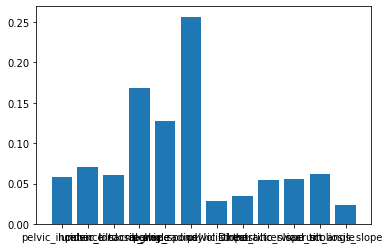

<Figure size 2880x1440 with 0 Axes>

In [240]:
plt.bar(data=feature_import_xgb,x=X.columns,height='importance')
plt.figure(figsize=(40,20))


In [243]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold

k_fold = StratifiedKFold(n_splits=6,shuffle = True,random_state=1)
XGB_model = XGBClassifier(n_estimators=100,random_state=1)
cv_score = cross_val_score(estimator=XGB_model,X=Xtrain,y=ytrain,cv=k_fold,scoring='accuracy',verbose=2)

print(cv_score)

#update_performance('XGBClassifier',ytest,ypred)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[0.78378378 0.77777778 0.86111111 0.97222222 0.80555556 0.83333333]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished


Observation
degree_spondylolisthesis
sacral_slope 
pelvic_radius
pelvic_tilt
sacrum_angle
lumbar_lordosis_angle

These are important features which give high value to score

In [245]:
pref_score

,accuracy_score,cohen_kappa_score,precision_score,recall_score,f1_score,model_name
0,0.870968,0.686869,0.777778,0.777778,0.777778,Logistic_regression
1,0.784946,0.510269,0.606061,0.740741,0.666667,DecisionTreeClassifier
2,0.817204,0.604057,0.631579,0.888889,0.738462,GaussianNB
3,0.731183,0.417731,0.526316,0.740741,0.615385,BernoulliNB
4,0.806452,0.530303,0.666667,0.666667,0.666667,DecisionTreeClassifier_adjusted_param_grid
5,0.817204,0.579409,0.656250,0.777778,0.711864,XGBClassifier


In [247]:
gb_model = GaussianNB()
gb_model.fit(Xtrain,ytrain)

ypred = gb_model.predict(Xtest)
accuracy_score(ytest,ypred)

confusion_matrix(ytest,ypred)

array([[52, 14],
       [ 3, 24]])

comparative to other model gaussian model shows proper actual and predicted in False Positive and False negative F1-score is taken in this measure